# New Phone In Market (just checking I can edit)

## Introduction

#### Over the last two decades, we have had an enormous increase in the use of mobile phones. It is said that the number of mobile phone users will increase to 7.33 billion by 2023 (Marko, 2021). However, we also know that the prices of these mobile phones have also increased significantly. How can we assume how much the price of our phone is going to be? How will rising phone companies know how much to set their phone prices for?<br><br> By using a dataset containing price ranges and the variables of a mobile phone, **based on memory, power, phone height, phone width and pixels, can we predict the price range of the phone (on a scale of 0-3)?** This dataset has provided us with a wide range of variables on phone components such as RAM, power and pixels, as well as a price range of 0 to 3 of each phone, 0 being the lowest cost and 3 being the highest. Dataset from: https://www.kaggle.com/iabhishekofficial/mobile-price-classification 

## Preliminary exploratory data analysis

### Importing libraries and read dataset

We use tidyverse to read, tidy, manipulate, visual data and so on. We use tidymodels package to predict the class of a test dataset. And repr is used to resize plots. 

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
mobile <- read_csv("https://raw.githubusercontent.com/ClaireJ2100/dsci100_project/main/data/mobile.csv")

glimpse(mobile)

Parsed with column specification:
cols(
  .default = col_double()
)

See spec(...) for full column specifications.



Rows: 2,000
Columns: 21
$ battery_power <dbl> 842, 1021, 563, 615, 1821, 1859, 1821, 1954, 1445, 509,…
$ blue          <dbl> 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1…
$ clock_speed   <dbl> 2.2, 0.5, 0.5, 2.5, 1.2, 0.5, 1.7, 0.5, 0.5, 0.6, 2.9, …
$ dual_sim      <dbl> 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1…
$ fc            <dbl> 1, 0, 2, 0, 13, 3, 4, 0, 0, 2, 0, 5, 2, 7, 13, 3, 1, 7,…
$ four_g        <dbl> 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0…
$ int_memory    <dbl> 7, 53, 41, 10, 44, 22, 10, 24, 53, 9, 9, 33, 33, 17, 52…
$ m_dep         <dbl> 0.6, 0.7, 0.9, 0.8, 0.6, 0.7, 0.8, 0.8, 0.7, 0.1, 0.1, …
$ mobile_wt     <dbl> 188, 136, 145, 131, 141, 164, 139, 187, 174, 93, 182, 1…
$ n_cores       <dbl> 2, 3, 5, 6, 2, 1, 8, 4, 7, 5, 5, 8, 4, 4, 1, 2, 8, 3, 5…
$ pc            <dbl> 2, 6, 6, 9, 14, 7, 10, 0, 14, 15, 1, 18, 17, 11, 17, 16…
$ px_height     <dbl> 20, 905, 1263, 1216, 1208, 1004, 381, 512, 386, 1137, 2…
$ px_width      <dbl> 756, 1

### Cleaning and wrangling
We want to use price range(price_range), memory(ram), power(battery_power), phone size(sc_h * sc_w) and pixels(fc) as variables. 

In [3]:
mobile <- mobile %>%
    mutate(phone_size = sc_h * sc_w) %>%
    select(price_range, battery_power, ram, phone_size, fc)

mobile

price_range,battery_power,ram,phone_size,fc
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,842,2549,63,1
2,1021,2631,51,0
2,563,2603,22,2
⋮,⋮,⋮,⋮,⋮
3,1911,3057,9,1
0,1512,869,180,4
3,510,3919,76,5


### Create the train / test split

In [4]:
set.seed(1234)
mobile_split <- initial_split(mobile, prop = 0.75, strata = price_range)
mobile_train <- training(mobile_split)
mobile_test <- testing(mobile_split)

glimpse(mobile_train)
glimpse(mobile_test)

Rows: 1,500
Columns: 5
$ price_range   <dbl> 1, 2, 2, 2, 1, 1, 3, 0, 0, 0, 3, 3, 2, 0, 3, 3, 1, 3, 3…
$ battery_power <dbl> 842, 1021, 563, 615, 1821, 1859, 1821, 1954, 1445, 509,…
$ ram           <dbl> 2549, 2631, 2603, 2769, 1411, 1067, 3220, 700, 1099, 51…
$ phone_size    <dbl> 63, 51, 22, 128, 16, 17, 104, 48, 17, 190, 10, 126, 7, …
$ fc            <dbl> 1, 0, 2, 0, 13, 3, 4, 0, 0, 2, 0, 5, 7, 3, 1, 7, 11, 12…
Rows: 500
Columns: 5
$ price_range   <dbl> 1, 0, 1, 3, 3, 1, 3, 1, 0, 3, 2, 1, 2, 3, 3, 0, 1, 0, 1…
$ battery_power <dbl> 1815, 1866, 682, 1579, 1310, 725, 1646, 1253, 1195, 172…
$ ram           <dbl> 1482, 373, 2337, 3532, 3845, 1326, 3339, 1878, 504, 358…
$ phone_size    <dbl> 0, 126, 11, 187, 0, 40, 180, 0, 27, 50, 0, 35, 28, 144,…
$ fc            <dbl> 2, 13, 4, 0, 0, 16, 8, 5, 1, 1, 2, 8, 15, 13, 11, 4, 8,…


### Summarize the data
'Summary' can summarize the data. 'Dim' can return the rows and columns. 'Colsums' can return how many rows have missing data.

In [5]:
summary(mobile_train)

dim(mobile_train)

colSums(sapply(mobile_train, is.na))

  price_range   battery_power         ram         phone_size    
 Min.   :0.00   Min.   : 501.0   Min.   : 258   Min.   :  0.00  
 1st Qu.:0.75   1st Qu.: 849.5   1st Qu.:1201   1st Qu.: 18.00  
 Median :1.50   Median :1226.0   Median :2146   Median : 54.00  
 Mean   :1.50   Mean   :1236.5   Mean   :2127   Mean   : 79.53  
 3rd Qu.:2.25   3rd Qu.:1604.5   3rd Qu.:3074   3rd Qu.:120.00  
 Max.   :3.00   Max.   :1998.0   Max.   :3998   Max.   :342.00  
       fc        
 Min.   : 0.000  
 1st Qu.: 1.000  
 Median : 3.000  
 Mean   : 4.259  
 3rd Qu.: 7.000  
 Max.   :18.000  

[1] 1500    5

price_range battery_power           ram    phone_size            fc 
            0             0             0             0             0

### Visualize the data
'Ggpairs' can show the correlation between all the variables. <br>

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



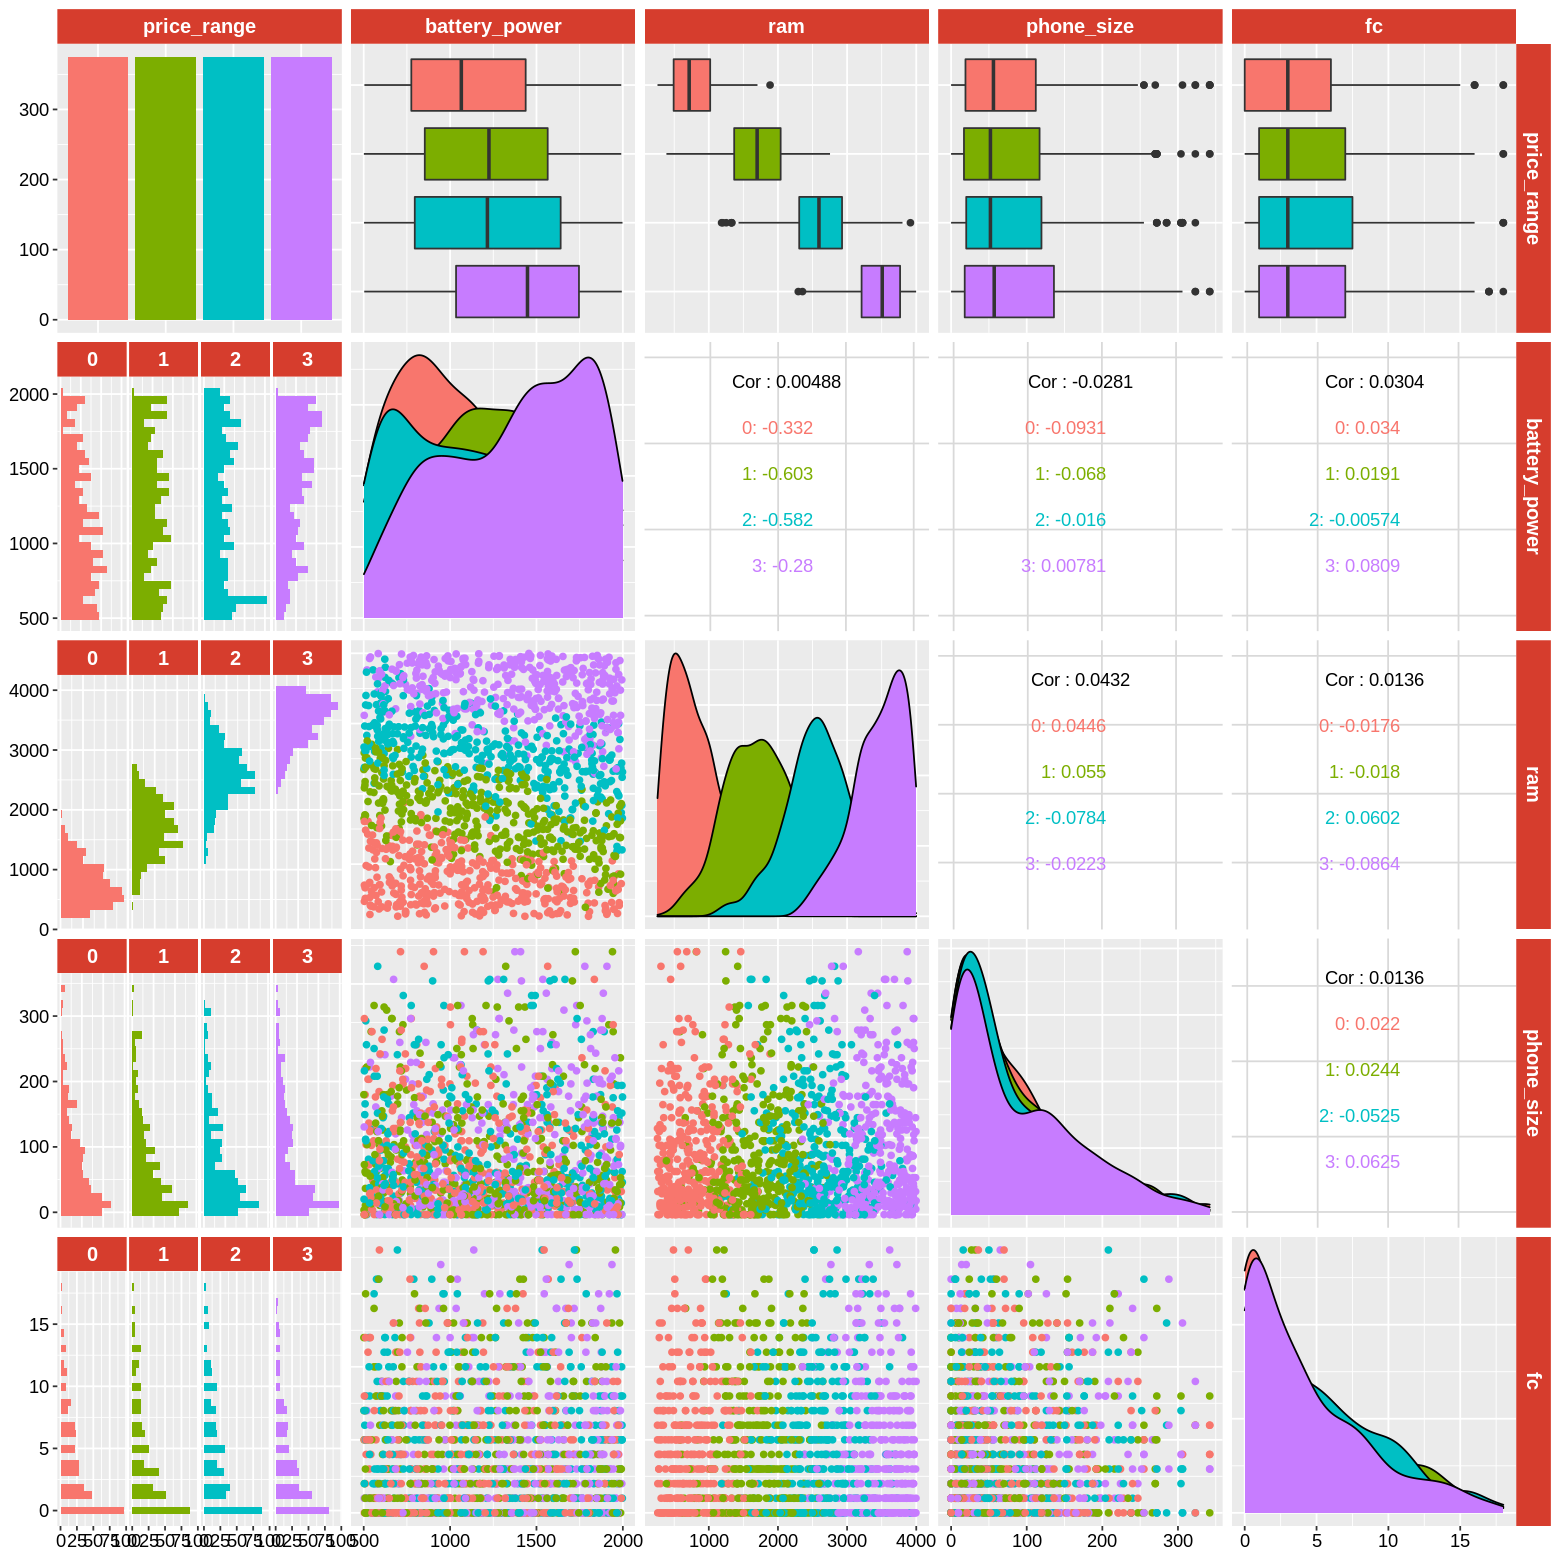

In [6]:
library(GGally)
library(ggplot2)
options(repr.plot.width = 13, repr.plot.height = 13)

mobile_train$price_range <- as.factor(mobile_train$price_range)

ggpairs(mobile_train, showStrips = T, ggplot2 :: aes(color = price_range)) +
    theme(axis.text = element_text(color = "black", size = 11),
             strip.background = element_rect(fill = "#d63d2d"),
             strip.text= element_text(colour= "white", size = 12, face = "bold"))

We use bar plots because it’s simple and splits each individual measurement into different bars that can be distinguished and compared easily.

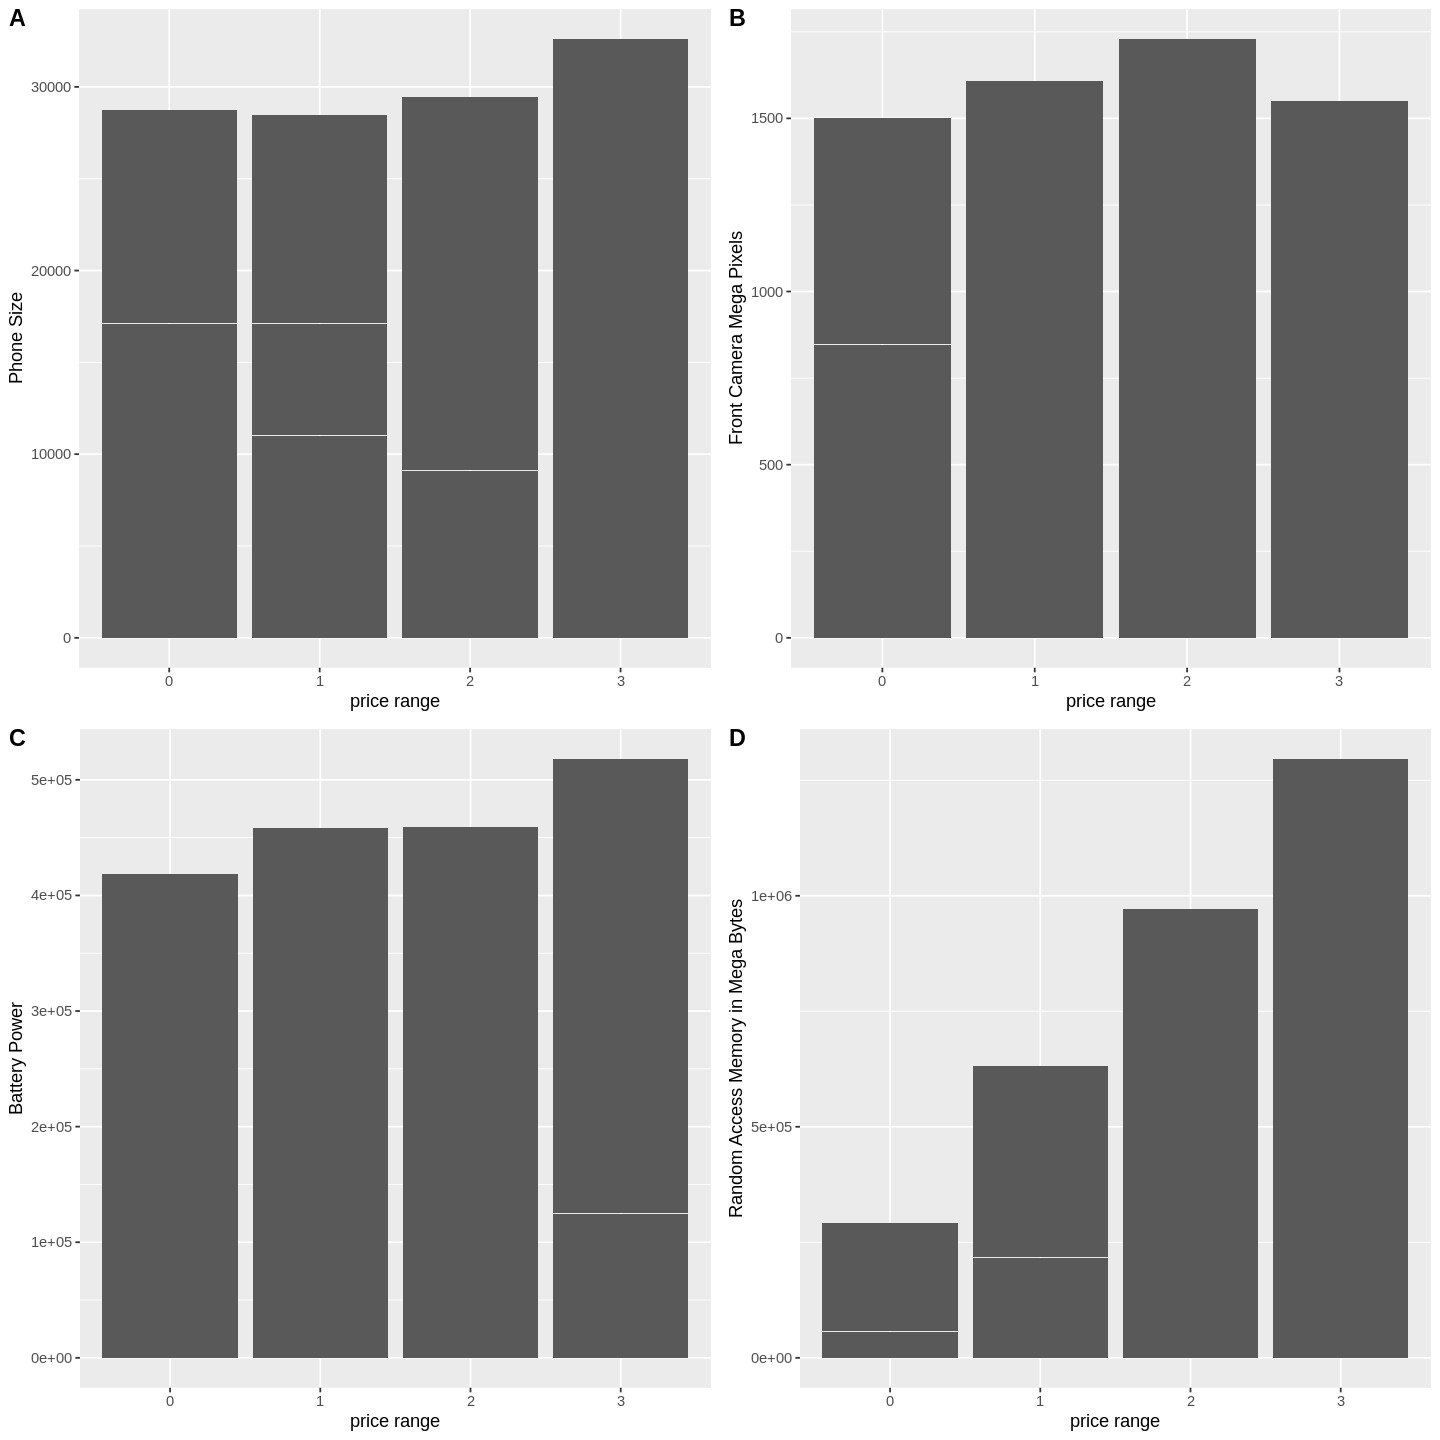

In [7]:
options(repr.plot.width = 12, repr.plot.height = 12)

g1 <- ggplot(mobile_train, aes(x = price_range, y = phone_size)) +
        geom_bar(stat = "identity") + 
        labs(x = "price range", y = "Phone Size")

g2 <- ggplot(mobile_train, aes(x = price_range, y = fc)) +
        geom_bar(stat = "identity") +
        labs(x = "price range", y = "Front Camera Mega Pixels")

g3 <- ggplot(mobile_train, aes(x = price_range, y = battery_power)) +
        geom_bar(stat = "identity") +
        labs(x = "price range", y = "Battery Power")

g4 <- ggplot(mobile_train, aes(x = price_range, y = ram)) +
       geom_bar(stat = "identity") +
       labs(x = "price range", y = "Random Access Memory in Mega Bytes")


cowplot::plot_grid(g1, g2, g3, g4, labels = "AUTO" , nrow = 2, ncol = 2)

### Methods


#### We plan to conduct our data analysis by focusing on the 5 variables, memory, power, phone height, phone width and pixels to predict the price range of the phone whether it be very affordable or expensive.
#### The reason why we are using these variables is because the other predictors were either categorical, such as bluetooth and wifi,  or have the same effect as the ones we are utilizing right now.
#### Firstly, we will clean, wrangle and standardize our data set. We will then split it into a training set and testing set where we will create our recipe and workflow to help our predictions based on the variables above. Moreover, we will evaluate classification accuracy using a validation data set and appropriate metrics. And we will excecute cross-validation in R to choose the number of neighbors in K-nearest neighours classifier.   
#### To visualize our results we will use scatter plots so that we can observe the proximity of our predicted data value to those of others and estimate its price range visually. 

### Expected outcomes and significance
#### Based on the classification of the data set we expect to find the estimated price range that corresponds to the parameters of the phone model described. It is important to consumers who are looking for certain qualities in their phone to compare the pros and cons in the phone’s quality versus the actual cost so they can come to a decision on which phone is best for them.  Additional inquiries regarding these findings would be the change in price that would lead to a different quality phone, or vice versa with the other way around and how these qualities might further improve in the future.


### Reference
M., M. (2022, January 23). 29+ Smartphone Usage Statistics: Around the World in 2022. Leftronic. https://leftronic.com/blog/smartphone-usage-statistics/#:%7E:text=11.-,Mobile%20owners%20worldwide%20will%20increase%20to%207.33%20billion%20by%202023,of%20the%20next%20four%20years.

Sharma, A. (2018, January 28). Mobile price classification. Kaggle. Retrieved March 10, 2022, from https://www.kaggle.com/iabhishekofficial/mobile-price-classification 

---------------------------------------------------------------------------------------------------------------------------

In [8]:
mobile_train

price_range,battery_power,ram,phone_size,fc
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,842,2549,63,1
2,1021,2631,51,0
2,563,2603,22,2
⋮,⋮,⋮,⋮,⋮
2,1965,2032,110,0
3,1911,3057,9,1
0,1512,869,180,4


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.7300000,5,0.014491377,Model1
2,roc_auc,hand_till,0.8893926,5,0.006995633,Model1
4,accuracy,multiclass,0.7793333,5,0.007408704,Model2
⋮,⋮,⋮,⋮,⋮,⋮,⋮
13,roc_auc,hand_till,0.9465378,5,0.003851592,Model8
15,accuracy,multiclass,0.7960000,5,0.009510228,Model9
15,roc_auc,hand_till,0.9467689,5,0.003925835,Model9


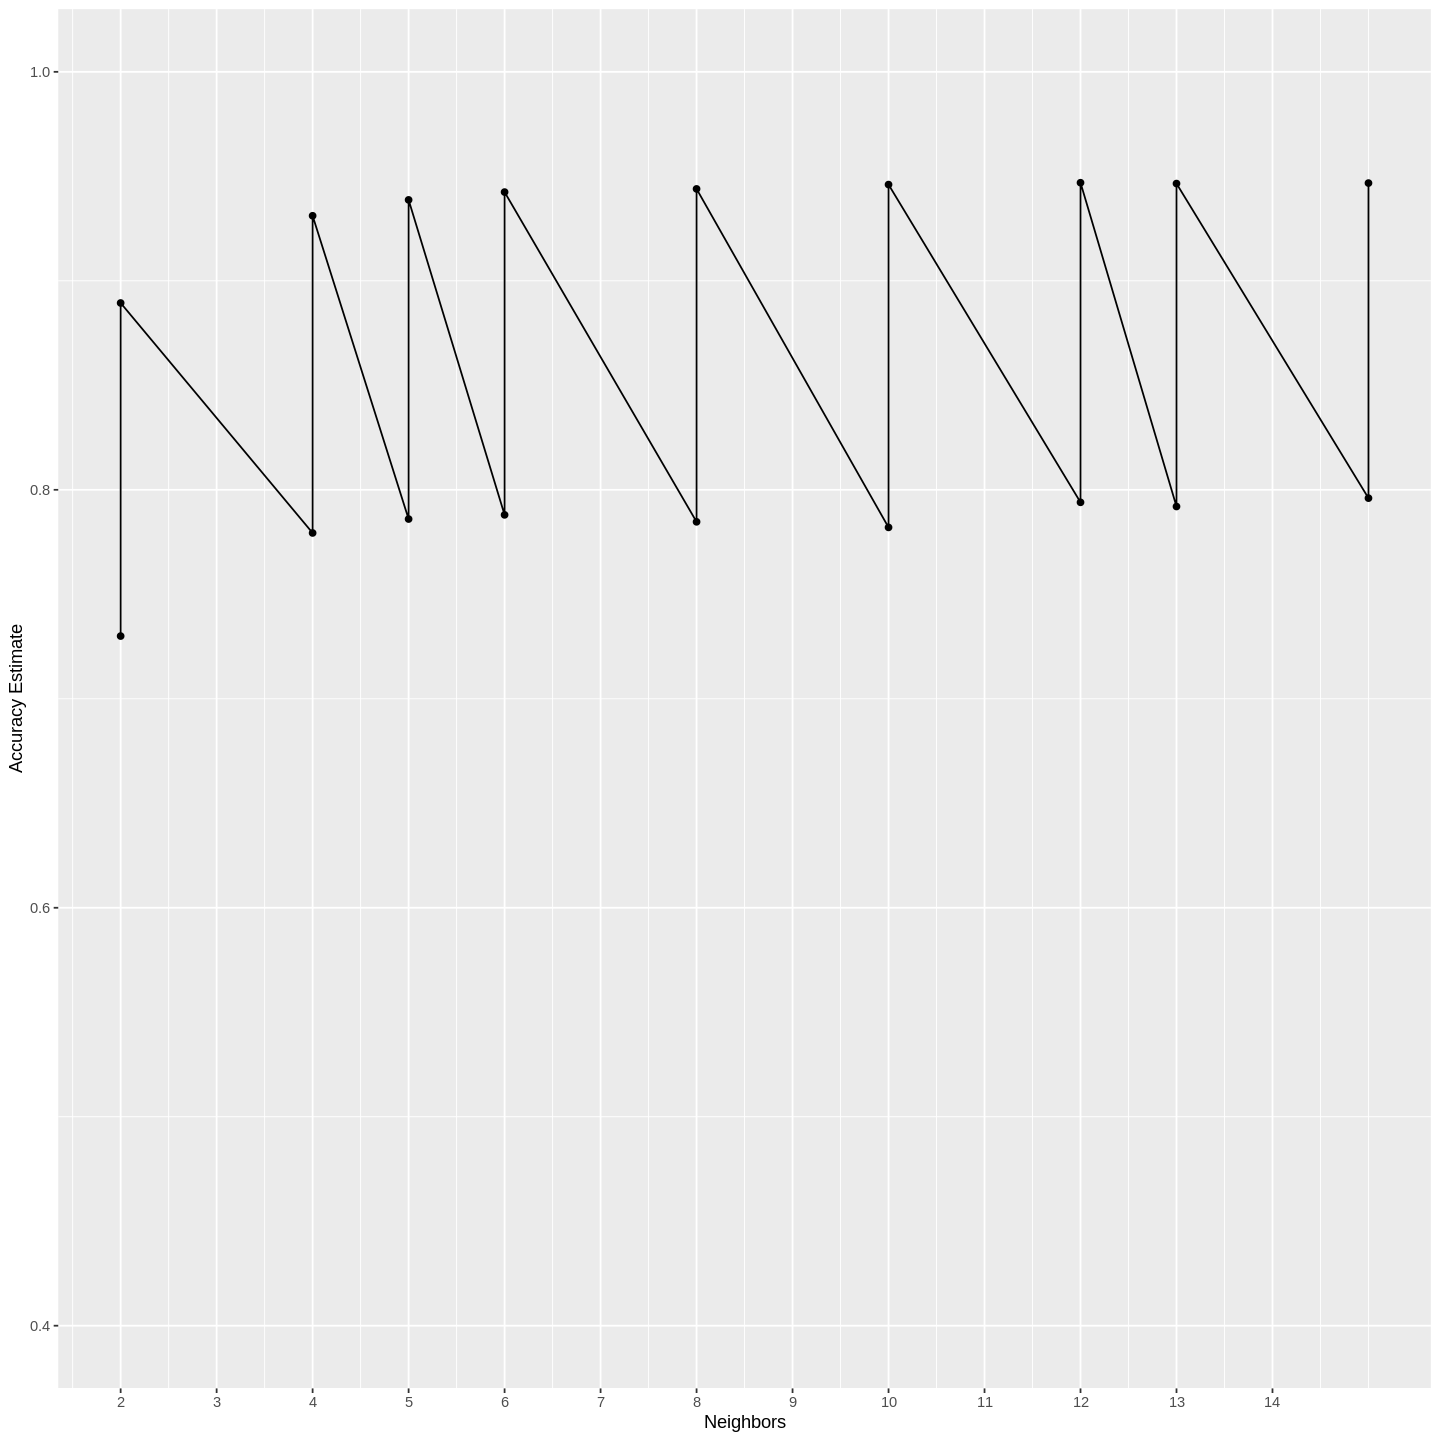

In [9]:
mobile_recipe <- recipe(price_range ~. , data = mobile_train) %>%
   step_scale(all_predictors()) %>%
   step_center(all_predictors()) #standardize and center the data

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
      set_engine("kknn") %>%
      set_mode("classification")

mobile_vfold <- vfold_cv(mobile_train, v = 5, strata = price_range)

knn_results <- workflow() %>%
      add_recipe(mobile_recipe) %>%
      add_model(knn_tune) %>%
      tune_grid(resamples = mobile_vfold, grid = 10) %>%
      collect_metrics()

knn_results

accuracies <- knn_results %>% 
      filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(knn_results, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis

accuracy_versus_k

Looks like best n value is in the 10 to 12 range

In [10]:
mobile_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 12) %>%
      set_engine("kknn") %>%
      set_mode("classification") #doing the prediction with the now determined best neighbor value
                               
                               
mobile_fit_2 <-  workflow() %>%
      add_recipe(mobile_recipe) %>%
      add_model(mobile_spec) %>%
      fit(data = mobile_train)

mobile_test$price_range <- as.factor(mobile_test$price_range)

mobile_predictions <- predict(mobile_fit_2 , mobile_test) %>%
      bind_cols(mobile_test) 
mobile_predictions


mobile_metrics <- mobile_predictions %>%
    metrics(truth = price_range, estimate = .pred_class)          
mobile_metrics

mobile_conf_mat <- mobile_predictions %>% 
      conf_mat(truth = price_range, estimate = .pred_class)   
mobile_conf_mat

mobile_conf_mat

.pred_class,price_range,battery_power,ram,phone_size,fc
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1815,1482,0,2
0,0,1866,373,126,13
2,1,682,2337,11,4
⋮,⋮,⋮,⋮,⋮,⋮
0,0,674,1180,18,1
3,3,858,3978,272,1
2,3,510,3919,76,5


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7680000
kap,multiclass,0.6906667


          Truth
Prediction   0   1   2   3
         0 107  12   0   0
         1  18  96  22   0
         2   0  17  86  30
         3   0   0  17  95

          Truth
Prediction   0   1   2   3
         0 107  12   0   0
         1  18  96  22   0
         2   0  17  86  30
         3   0   0  17  95

In [11]:
mobile <- mobile %>%
   mutate(price_range = as_factor(price_range))

mobile_all <- tibble(ram = 2500, battery_power = 1700, phone_size = 55, fc = 10)

knn_all <- nearest_neighbor(weight_func = "rectangular", neighbors = 12) %>%
  set_engine("kknn") %>%
  set_mode("classification")
knn_all


mobile_recipe_all <- recipe(price_range ~ ram + battery_power + phone_size + fc, data = mobile) %>%
step_scale(all_predictors()) %>%
step_center(all_predictors())
mobile_recipe_all

mobile_fit_all <- workflow() %>%
add_model(knn_all) %>%
add_recipe(mobile_recipe_all) %>%
fit(data = mobile)
mobile_fit_all

mobile_tibble <- tibble(ram = 2500, battery_power = 1700, phone_size = 55, fc = 10)
mobile_all_predicted <- predict(mobile_fit_all, mobile_tibble)
mobile_all_predicted

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 12
  weight_func = rectangular

Computational engine: kknn 


Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Operations:

Scaling for all_predictors()
Centering for all_predictors()

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~12, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2045
Best kernel: rectangular
Best k: 12

.pred_class
<fct>
2


In [13]:
are_grid <- seq(min(ram, na.rm = TRUE), 
                max(ram, na.rm = TRUE), 
                length.out = 100)
smo_grid <- seq(min(price_range, na.rm = TRUE), 
                max(price_range, na.rm = TRUE), 
                length.out = 100)
asgrid <- as_tibble(expand.grid(ram = are_grid, 
                                price_range = smo_grid))

# # use the fit workflow to make predictions at the grid points
knnPredGrid <- predict(mobile_fit_all, asgrid)

# # bind the predictions as a new column with the grid points
prediction_table <- bind_cols(knnPredGrid, asgrid) %>%
  rename(price_range = .pred_class)

# # plot:
# # 1. the colored scatter of the original data
# # 2. the faded colored scatter for the grid points
wkflw_plot <-
  ggplot() +
  geom_point(data = mobile, 
             mapping = aes(x = ram, 
                           y = price_range, 
                           color = price_range, 
                           size = 10), 
             alpha = 0.75) +
  geom_point(data = prediction_table, 
             mapping = aes(x = ram, 
                           y = price_range, 
                           color = price_range), 
             alpha = 0.15, 
             size = 5) +
  labs(color = "Price Range of Phone (0-3)", 
       x = "Memory", 
       y = "Price Range (0-3)") +
  theme(text = element_text(size = 12))

wkflw_plot

ERROR: Error in seq(min(ram, na.rm = TRUE), max(ram, na.rm = TRUE), length.out = 100): object 'ram' not found
